In [15]:
#Python Data Analysis imports
import pandas as pd
from pandas import Series,DataFrame
import numpy as np

#Visualization imports
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

#To grab stock data
from pandas_datareader import data
from datetime import datetime

#To handle floats in Python 2
from __future__ import division

We're going to analyse some tech stocks, and it seems like a good idea to look at their performance over the last year. We can create a list with the stock names, for future looping.

In [16]:
#We're going to analyse stock info for Apple, Google, Microsoft, and Amazon
tech_list = ['AAPL','GOOG','MSFT','AMZN','NFLX', 'FB']

In [18]:
#Setting the end date to today
end = datetime.now()
print(end)
#Start date set to 1 year back
start = datetime(end.year-1,end.month,end.day)
print(start)

2020-03-11 15:52:46.613759
2019-03-11 00:00:00


In [23]:
#Using Yahoo Finance to grab the stock data
for stock in tech_list:
        globals()[stock] = data.DataReader(stock, 'yahoo', start, end) #The globals method sets the stock name to a global variable


In [25]:
AAPL.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-03-11,179.119995,175.350006,175.490005,178.899994,32011000.0,176.588608
2019-03-12,182.669998,179.369995,180.000000,180.910004,32467600.0,178.572662
2019-03-13,183.300003,180.919998,182.250000,181.710007,31032500.0,179.362320
2019-03-14,184.100006,182.559998,183.899994,183.729996,23579500.0,181.356216
2019-03-15,187.330002,183.740005,184.850006,186.119995,39042900.0,183.715332


In [26]:
#Basic stats for Apple's Stock
AAPL.describe()

,High,Low,Open,Close,Volume,Adj Close
count,253.000000,253.000000,253.000000,253.000000,2.530000e+02,253.000000
mean,236.874269,232.361700,234.337391,234.871976,2.993947e+07,233.529618
std,45.192782,44.070050,44.529647,44.837556,1.337561e+07,45.449205
min,177.919998,170.270004,175.440002,173.300003,1.136200e+07,171.719727
25%,201.399994,198.440002,199.679993,200.020004,2.115810e+07,197.978088
50%,218.029999,211.710007,214.839996,214.169998,2.654470e+07,213.023361
75%,270.070007,265.309998,267.269989,267.250000,3.415410e+07,266.617249
max,327.850006,323.350006,324.739990,327.200012,1.067212e+08,327.200012


In [27]:
#Some basic info about the dataframe
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 253 entries, 2019-03-11 to 2020-03-10
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       253 non-null    float64
 1   Low        253 non-null    float64
 2   Open       253 non-null    float64
 3   Close      253 non-null    float64
 4   Volume     253 non-null    float64
 5   Adj Close  253 non-null    float64
dtypes: float64(6)
memory usage: 13.8 KB


### Line chart over time

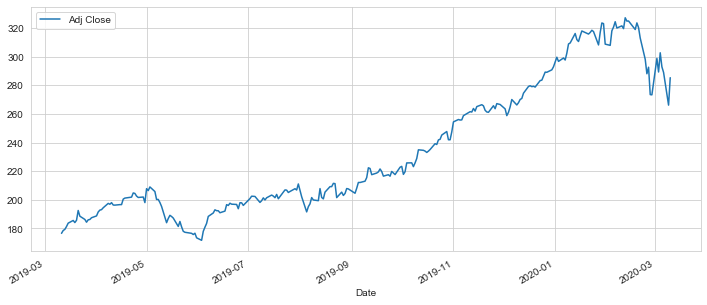

In [28]:
#Plotting the stock's adjusted closing price using pandas
AAPL['Adj Close'].plot(legend=True,figsize=(12,5))

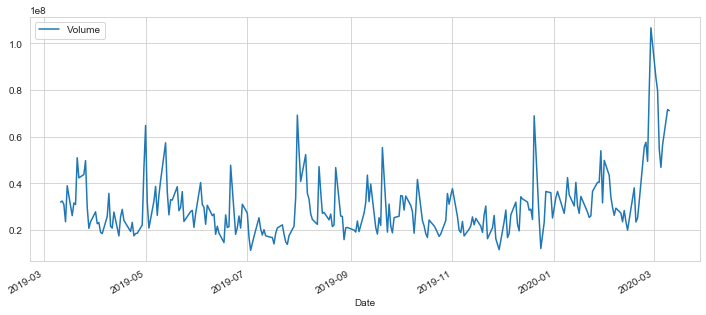

In [29]:
#Plotting the total volume being traded over time
AAPL['Volume'].plot(legend=True,figsize=(12,5))

### Plotting SMA for stocks

Let's check out the moving average for stocks over a 10, 20 and 50 day period of time. We'll add that information to the stock's dataframe.

In [30]:
ma_day = [10,20,50]

for ma in ma_day:
    column_name = "MA for %s days" %(str(ma))
    
    AAPL[column_name] = AAPL['Adj Close'].rolling(window=ma,center=False).mean()

In [31]:
AAPL.tail()

,High,Low,Open,Close,Volume,Adj Close,MA for 10 days,MA for 20 days,MA for 50 days
Date,,,,,,,,,
2020-03-04,303.399994,293.130005,296.440002,302.739990,54794600.0,302.739990,295.000992,308.798442,306.890981
2020-03-05,299.549988,291.410004,295.519989,292.920013,46893200.0,292.920013,292.262994,307.409996,307.173813
2020-03-06,290.820007,281.230011,282.000000,289.029999,56544200.0,289.029999,289.860995,305.639496,307.287862
2020-03-09,278.089996,263.000000,263.750000,266.170013,71686200.0,266.170013,286.659998,302.946497,306.939324
2020-03-10,286.440002,269.369995,277.140015,285.339996,71184900.0,285.339996,286.385999,301.135997,306.861652


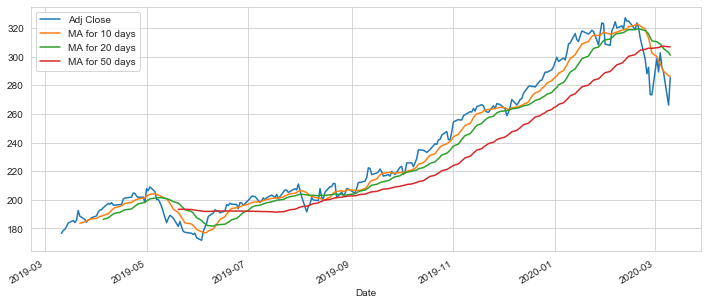

In [32]:
AAPL[['Adj Close','MA for 10 days','MA for 20 days','MA for 50 days']].plot(subplots=False,figsize=(12,5))

Moving averages for more days have a smoother plot, as they're less reliable on daily fluctuations. So even though, Apple's stock has a slight dip near the start of September, it's generally been on an upward trend since mid-July.

### Daily Return Average of a stock?

In [33]:
#The daily return column can be created by using the percentage change over the adjusted closing price
AAPL['Daily Return'] = AAPL['Adj Close'].pct_change()

In [34]:
AAPL['Daily Return'].tail()

Date
2020-03-04    0.046385
2020-03-05   -0.032437
2020-03-06   -0.013280
2020-03-09   -0.079092
2020-03-10    0.072022
Name: Daily Return, dtype: float64

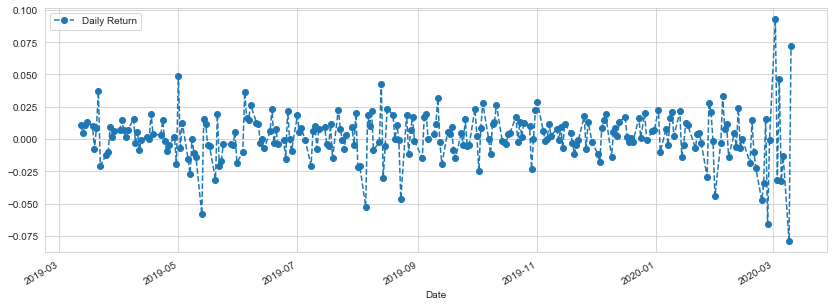

In [35]:
#Plotting the daily return
AAPL['Daily Return'].plot(figsize=(14,5),legend=True,linestyle='--',marker='o')

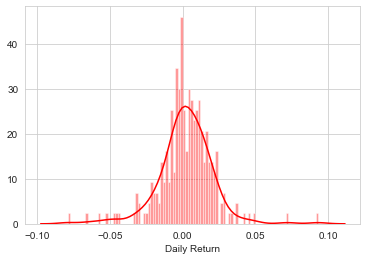

In [36]:
sns.distplot(AAPL['Daily Return'].dropna(),bins=100,color='red')

Positive daily returns seem to be slightly more frequent than negative returns for Apple.

### What was the correlation between daily returns of different stocks?

In [38]:
#Reading just the 'Adj Close' column this time
close_df = data.DataReader(tech_list,'yahoo',start,end)['Adj Close']

In [39]:
close_df.tail()

Symbols,AAPL,GOOG,MSFT,AMZN,NFLX,FB
Date,,,,,,
2020-03-04,302.739990,1386.520020,170.550003,1975.829956,383.790009,191.759995
2020-03-05,292.920013,1319.040039,166.270004,1924.030029,372.779999,185.169998
2020-03-06,289.029999,1298.410034,161.570007,1901.089966,368.970001,181.089996
2020-03-09,266.170013,1215.560059,150.619995,1800.609985,346.489990,169.500000
2020-03-10,285.339996,1280.390015,160.919998,1891.819946,364.130005,178.190002


In [41]:
#To get daily returns of stocks
rets_df = close_df.pct_change()

In [42]:
rets_df.tail()

Symbols,AAPL,GOOG,MSFT,AMZN,NFLX,FB
Date,,,,,,
2020-03-04,0.046385,0.033644,0.036715,0.035013,0.040730,0.031578
2020-03-05,-0.032437,-0.048669,-0.025095,-0.026217,-0.028688,-0.034366
2020-03-06,-0.013280,-0.015640,-0.028267,-0.011923,-0.010220,-0.022034
2020-03-09,-0.079092,-0.063809,-0.067773,-0.052854,-0.060926,-0.064001
2020-03-10,0.072022,0.053333,0.068384,0.050655,0.050911,0.051268


Let's try creating a scatterplot to visualise any correlations between different stocks. First we'll visualise a scatterplot for the relationship between the daily return of a stock to itself.

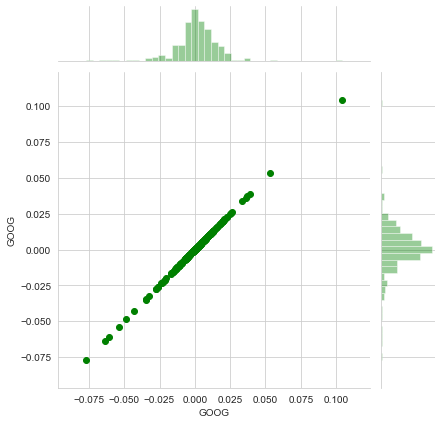

In [43]:
sns.jointplot('GOOG','GOOG',rets_df,kind='scatter',color='green')

As expected, the relationship is perfectly linear because we're trying to correlate something with itself. Now, let's check out the relationship between Google and Apple's daily returns.

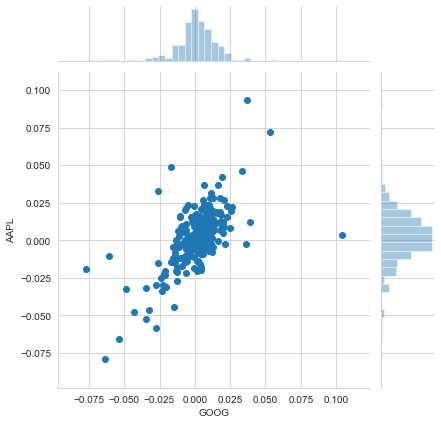

In [44]:
sns.jointplot('GOOG','AAPL',rets_df,kind='scatter')

There seems to be a minor correlation between the two stocks, looking at the figure above. The Pearson R Correlation Coefficient value of 0.45 echoes that sentiment.

But what about other combinations of stocks?

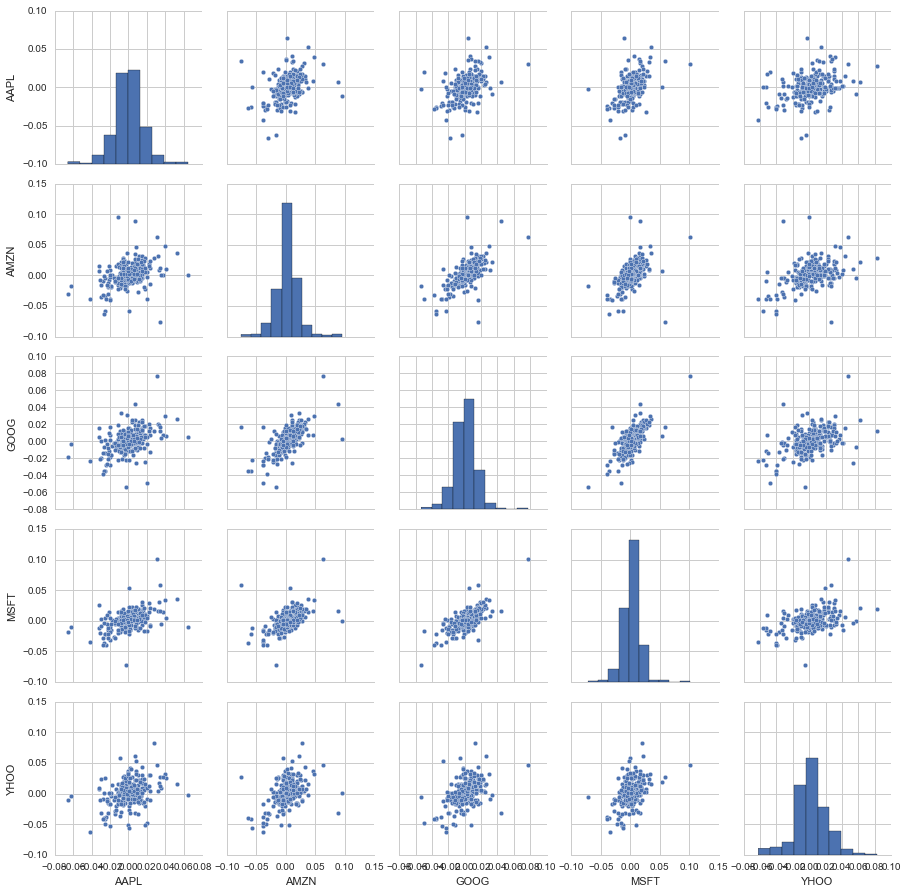

In [80]:
sns.pairplot(rets_df.dropna())

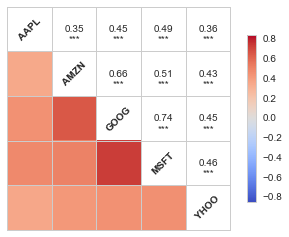

In [87]:
sns.corrplot(rets_df.dropna(),annot=True)

Google and Microsoft seem to have the highest correlation. But another interesting thing to note is that all tech companies that we explored are positively correlated.

### Expected Return vs Risk

A basic way to quantify risk is to compare the expected return (which can be the mean of the stock's daily returns) with the standard deviation of the daily returns. 

In [45]:
rets = rets_df.dropna()

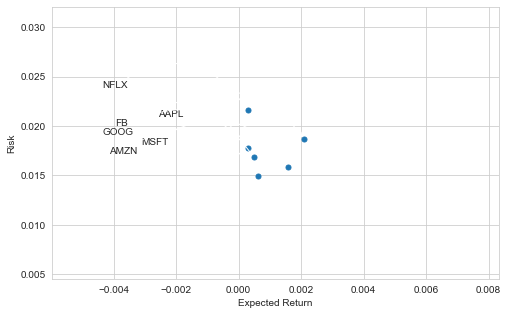

In [46]:
plt.figure(figsize=(8,5))

plt.scatter(rets.mean(),rets.std(),s=25)

plt.xlabel('Expected Return')
plt.ylabel('Risk')


#For adding annotatios in the scatterplot
for label,x,y in zip(rets.columns,rets.mean(),rets.std()):
    plt.annotate(
    label,
    xy=(x,y),xytext=(-120,20),
    textcoords = 'offset points', ha = 'right', va = 'bottom',
    arrowprops = dict(arrowstyle='->',connectionstyle = 'arc3,rad=-0.5'))
    


We'd want a stock to have a high expected return and a low risk; Google and Microsoft seem to be the safe options for that. Meanwhile, Yahoo and Amazon stocks have higher expected returns, but also have a higher risk

### Value at Risk

We can treat _Value at risk_ as the amount of money we could expect to lose for a given confidence interval. We'll use the 'Bootstrap' method and the 'Monte Carlo Method' to extract this value.

__Bootstrap Method__

Using this method, we calculate the empirical quantiles from a histogram of daily returns. The quantiles help us define our confidence interval.

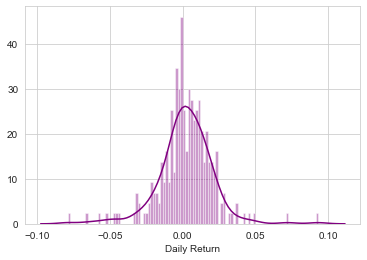

In [47]:
sns.distplot(AAPL['Daily Return'].dropna(),bins=100,color='purple')

To recap, our histogram for Apple's stock looked like the above. And our daily returns dataframe looked like:

In [48]:
rets.head()

Symbols,AAPL,GOOG,MSFT,AMZN,NFLX,FB
Date,,,,,,
2019-03-12,0.011235,0.014833,0.007002,0.001484,-0.007217,-0.000872
2019-03-13,0.004422,0.000101,0.007745,0.010585,0.013866,0.008434
2019-03-14,0.011117,-0.006511,0.000786,-0.002715,-0.006617,-0.018458
2019-03-15,0.013008,-0.000919,0.011519,0.015502,0.007357,-0.024622
2019-03-18,0.010209,-0.000169,0.014321,0.017397,0.005478,-0.033197


In [49]:
#Using Pandas built in qualtile method
rets['AAPL'].quantile(0.05)

-0.028058742518764203

### How can we attempt to predict future stock behaviour? Using Monte Carlo Simulations

In [50]:
days = 365

#delta t
dt = 1/365

mu = rets.mean()['GOOG']

sigma = rets.std()['GOOG']

In [57]:
#Function takes in stock price, number of days to run, mean and standard deviation values
def stock_monte_carlo(start_price,days,mu,sigma):
    
    price = np.zeros(days)
    price[0] = start_price
    
    shock = np.zeros(days)
    drift = np.zeros(days)
    
    for x in xrange(1,days):
        
        #Shock and drift formulas taken from the Monte Carlo formula
        shock[x] = np.random.normal(loc=mu*dt,scale=sigma*np.sqrt(dt))
        
        drift[x] = mu * dt
        
        #New price = Old price + Old price*(shock+drift)
        price[x] = price[x-1] + (price[x-1] * (drift[x]+shock[x]))
        
    return price

In [58]:
GOOG.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-03-11,1176.189941,1144.449951,1144.449951,1175.760010,1719200,1175.760010
2019-03-12,1200.000000,1178.260010,1178.260010,1193.199951,2013100,1193.199951
2019-03-13,1200.930054,1191.939941,1200.645020,1193.319946,1435900,1193.319946
2019-03-14,1197.880005,1184.479980,1194.510010,1185.550049,1172800,1185.550049
2019-03-15,1196.569946,1182.609985,1193.380005,1184.459961,2461800,1184.459961


Let's do a simulation of 100 runs, and plot them.

Text(0.5, 1.0, 'Monte Carlo Analysis for Google')

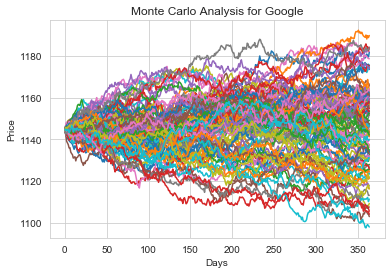

In [68]:
start_price = 1144.4499 #Taken from above
xrange = range
for i in xrange(100):
    plt.plot(stock_monte_carlo(start_price,days,mu,sigma))

plt.xlabel('Days')
plt.ylabel('Price')
plt.title('Monte Carlo Analysis for Google')

In [69]:
runs = 10000
simulations = np.zeros(runs)
xrange = range

for run in xrange(runs):
    simulations[run] = stock_monte_carlo(start_price,days,mu,sigma)[days-1]

Text(0.5, 1.0, 'Final price distribution for Google Stock after 365 days')

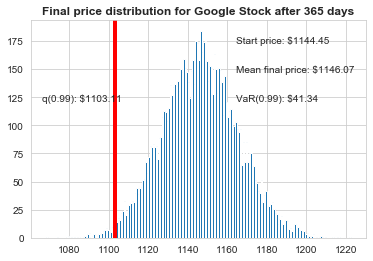

In [70]:
q = np.percentile(simulations,1)

plt.hist(simulations,bins=200)

plt.figtext(0.6,0.8,s="Start price: $%.2f" %start_price)

plt.figtext(0.6,0.7,"Mean final price: $%.2f" % simulations.mean())

plt.figtext(0.6,0.6,"VaR(0.99): $%.2f" % (start_price -q,))

plt.figtext(0.15,0.6, "q(0.99): $%.2f" % q)

plt.axvline(x=q, linewidth=4, color='r')

plt.title(u"Final price distribution for Google Stock after %s days" %days, weight='bold')